# Headers

In [8]:
import pandas as pd

In [9]:
from main import *

In [10]:
# Main Headers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Machine Learning and Model Headers

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MLFlow Setup

In [1]:
import dagshub
dagshub.init(repo_owner='vlavanga', repo_name='NEC-Falcons', mlflow=True)

Accessing as vlavanga

Initialized MLflow to track repo "vlavanga/NEC-Falcons"

Repository vlavanga/NEC-Falcons initialized!

In [2]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/vlavanga/NEC-Falcons.mlflow/")

In [3]:
'''
run_id_to_delete = "08c36193f1dd400382eabbc9d1e5a750" 


import mlflow
from mlflow.tracking import MlflowClient

client = MlflowClient()

client.delete_run(run_id_to_delete)
print(f"Run with ID '{run_id_to_delete}' marked for deletion.")

'''

'\nrun_id_to_delete = "08c36193f1dd400382eabbc9d1e5a750" \n\n\nimport mlflow\nfrom mlflow.tracking import MlflowClient\n\nclient = MlflowClient()\n\nclient.delete_run(run_id_to_delete)\nprint(f"Run with ID \'{run_id_to_delete}\' marked for deletion.")\n\n'

# United States 5950

In [118]:
mlflow.set_experiment("Unites States - 5950")

<Experiment: artifact_location='mlflow-artifacts:/199288c05f97485f955ef1260c043376', creation_time=1763081141048, experiment_id='3', last_update_time=1763081141048, lifecycle_stage='active', name='Unites States - 5950', tags={}>

## Log EDA

In [74]:
with mlflow.start_run(run_name="EDA - US - 5950"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2025-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    #mlflow.log_metric("RMSE", rmse)
    #mlflow.log_metric("MAE", mae)
    #mlflow.log_metric("MAPE", mape)
    
    # Artifacts (plots / reports)
    mlflow.log_artifact('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/us_5950.png')

    # Tags
    mlflow.set_tags({
        "phase": "EDA",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run EDA - US - 5950 at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/c4df4c91c6cd4d1990b61950ce1e51d2
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


In [75]:
with mlflow.start_run(run_name="EDA - US - 5950 - Standardized"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2025-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    #mlflow.log_metric("RMSE", rmse)
    #mlflow.log_metric("MAE", mae)
    #mlflow.log_metric("MAPE", mape)
    
    # Artifacts (plots / reports)
    mlflow.log_artifact('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/us_5950_std.png')

    # Tags
    mlflow.set_tags({
        "phase": "EDA",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run EDA - US - 5950 - Standardized at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/02a29be7d1514280b64361c18c578530
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


## Data Preview

In [11]:
df_us_5950 = pd.read_csv('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/us_5950.csv')
df_us_5950.head()

,PO_CREATED_DATE,SALES_ORG_NAME,FABRIC_TYPE,TEAM,SILHOUETTE,SPORT,DIVISION_NAME,SEASON_CONSOLIDATION,ORDERED_QUANTITY
0,20231103,United States,Wovens,RANCHO CUCAMONGA QUAKES,5950,BASEBALL,Headwear,Program,1
1,20231103,United States,Wovens,RENO ACES,5950,BASEBALL,Headwear,Program,1
2,20231025,United States,Other,SAN FRANCISCO GIANTS,5950,BASEBALL,Headwear,Custom,144
3,20231011,United States,Other,SAN DIEGO PADRES,5950,BASEBALL,Headwear,Custom,80
4,20231024,United States,Wovens,HOUSTON ASTROS,5950,BASEBALL,Headwear,Custom,864


In [12]:
df_us_5950['DIVISION_NAME'].unique()

array(['Headwear'], dtype=object)

In [13]:
verify_timeseries(df_us_5950)

[{'Year': 2025, 'Missing Months': [12]}]

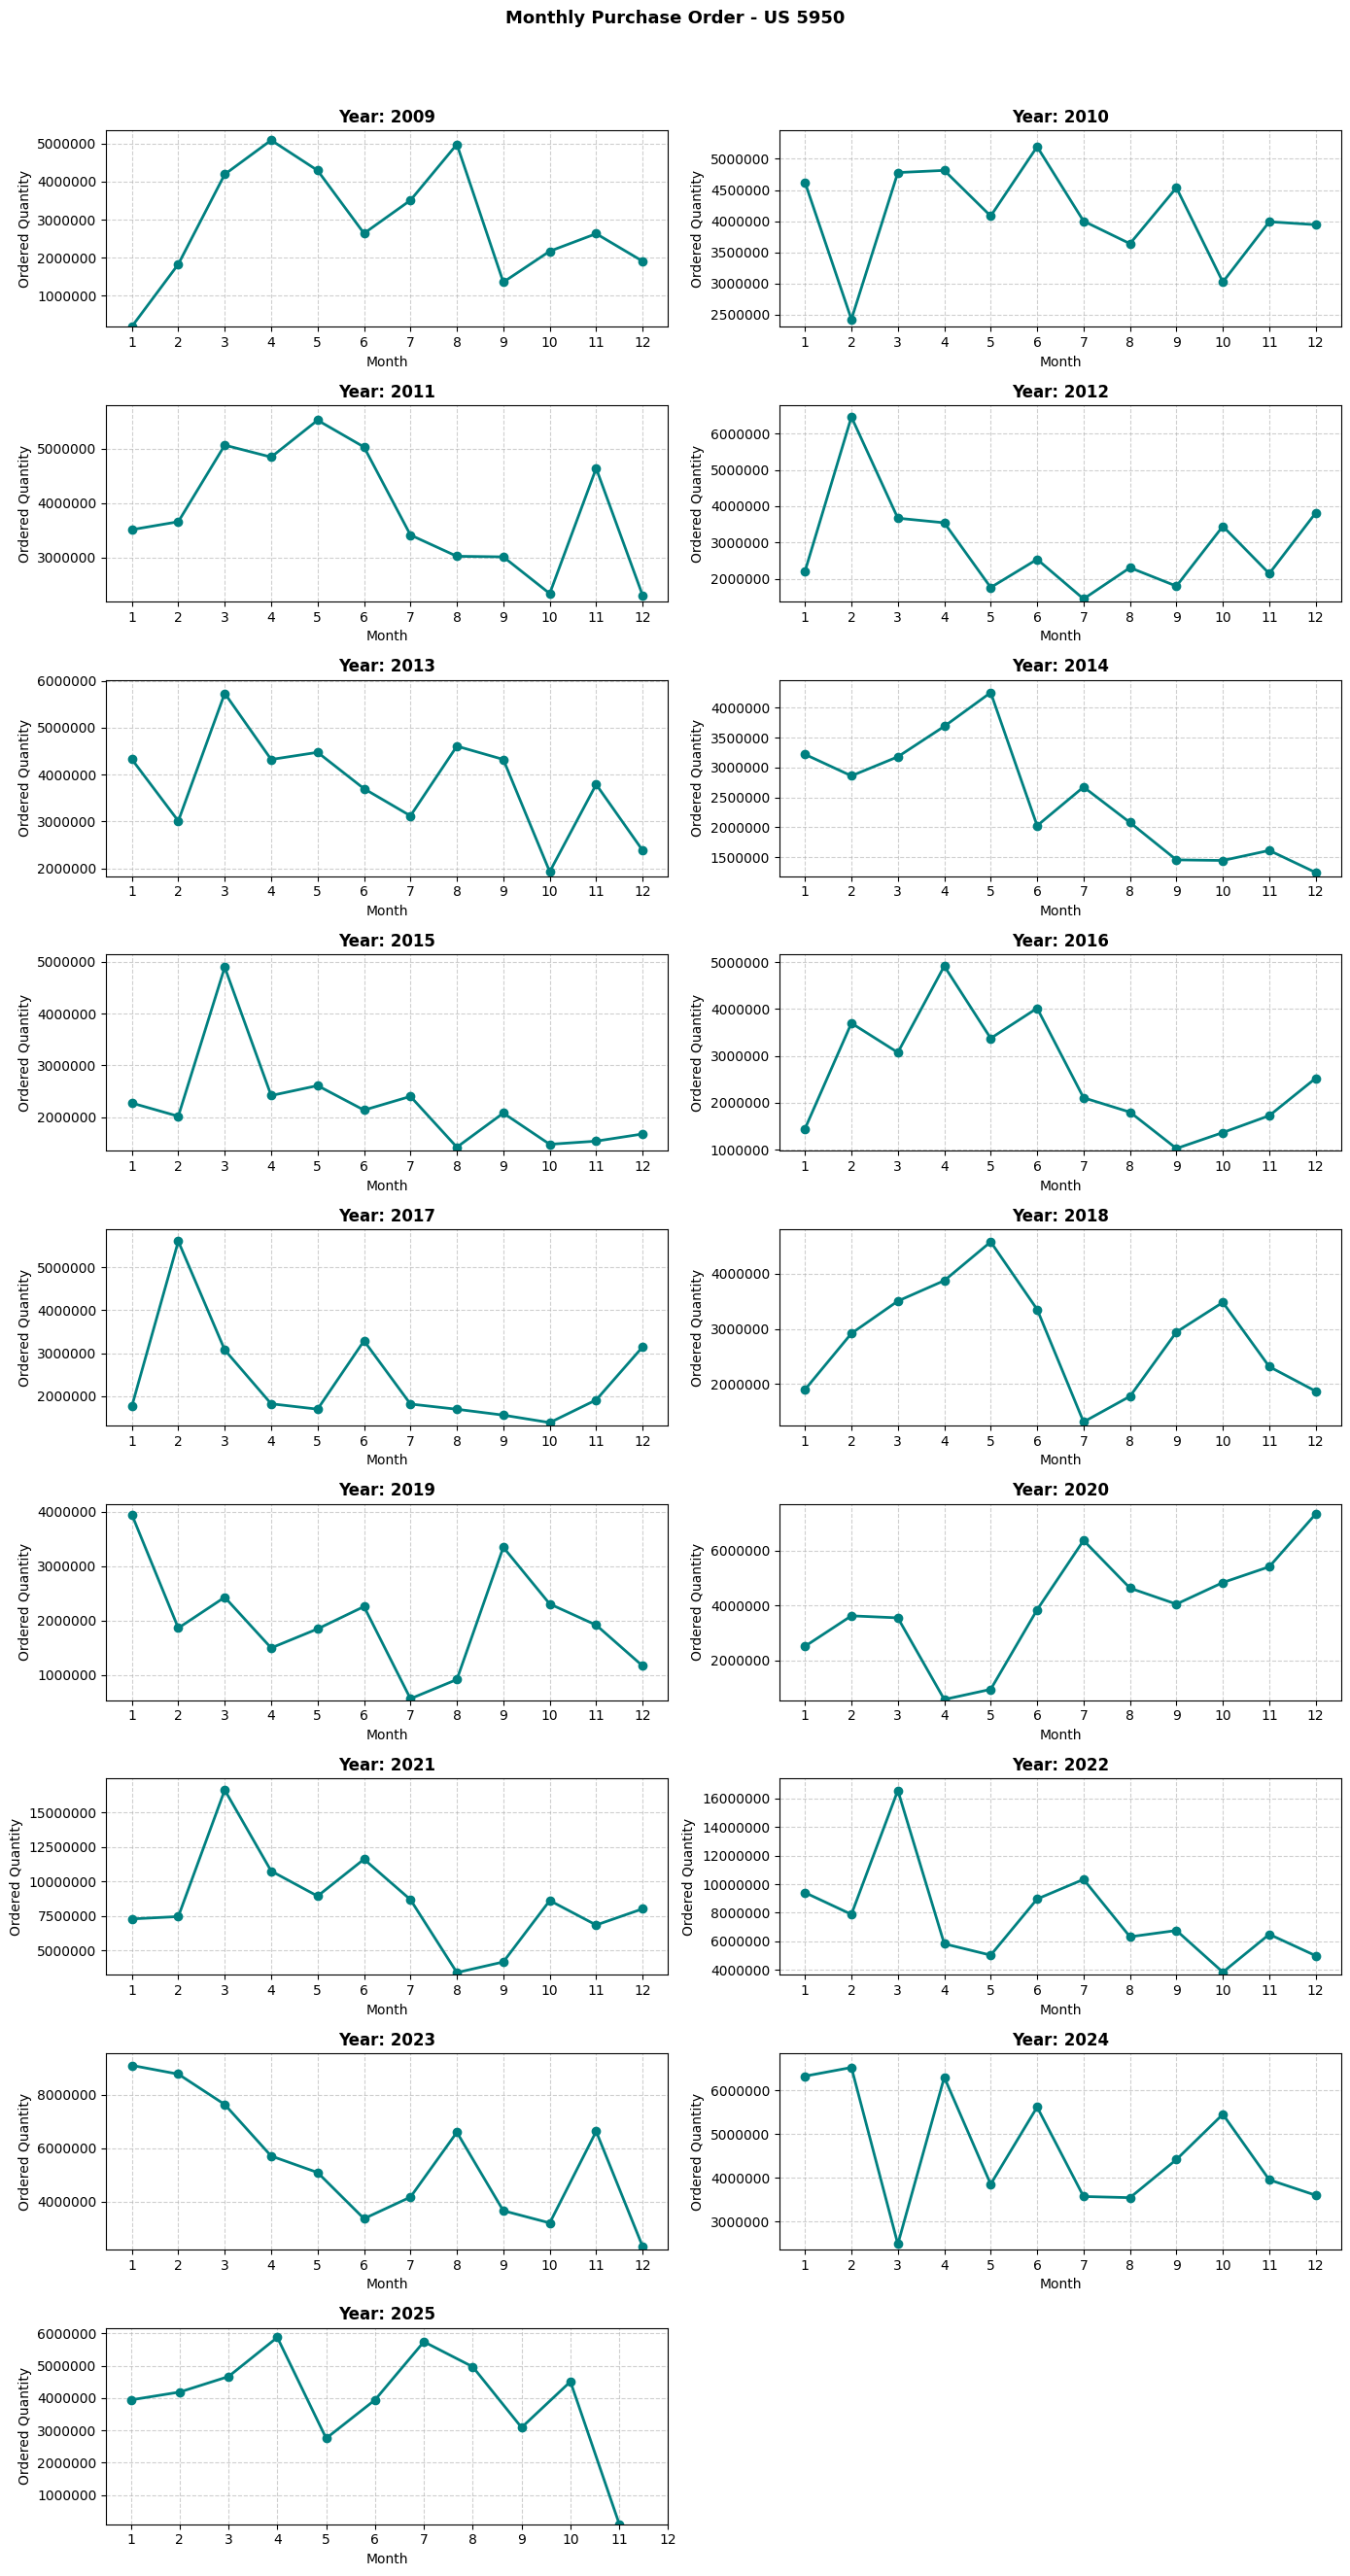

In [122]:
plot_data_by_year(df_us_5950, 'Monthly Purchase Order - US 5950')

In [123]:
df_us_5950_pre_ts = prepare_pre_ts_data(df_us_5950)

In [124]:
df_us_5950_pre_ts.tail()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2025-07-01,2025,7,5745551
2025-08-01,2025,8,4970012
2025-09-01,2025,9,3088946
2025-10-01,2025,10,4510275
2025-11-01,2025,11,97301


## Baseline Models - SNaive

In [14]:
df_us_5950_pre_ts = df_us_5950_pre_ts[~(df_us_5950_pre_ts['Year']==2025)]
df_us_5950_pre_ts.head()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2009-01-01,2009,1,183559
2009-02-01,2009,2,1825783
2009-03-01,2009,3,4194220
2009-04-01,2009,4,5093500
2009-05-01,2009,5,4296418


In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_us_5950_pre_ts['ORDERED_QUANTITY'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")


ADF Statistic: -1.9019
p-value: 0.3312


In [16]:
df_us_5950_pre_ts['diff_12'] = df_us_5950_pre_ts['ORDERED_QUANTITY'] - df_us_5950_pre_ts['ORDERED_QUANTITY'].shift(12)
df_adf_comp = df_us_5950_pre_ts.dropna(subset=['diff_12'])

In [17]:
result = adfuller(df_adf_comp['ORDERED_QUANTITY'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF Statistic: -1.8279
p-value: 0.3667


In [27]:
df_us_5950_pre_ts = df_us_5950_pre_ts.drop(columns='diff_12')

### Naïve

In [70]:
from statsmodels.tsa.forecasting.theta import ThetaModel
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split into train and test
train = df_us_5950_pre_ts.iloc[:-12]    # last 12 months for test
test = df_us_5950_pre_ts.iloc[-12:]

# Naive forecast: repeat last observed value
forecast = np.repeat(train['ORDERED_QUANTITY'].iloc[-1], len(test))

# Evaluate
mae = mean_absolute_error(test['ORDERED_QUANTITY'], forecast)
rmse = np.sqrt(mean_squared_error(test['ORDERED_QUANTITY'], forecast))
mape = np.mean(np.abs((test['ORDERED_QUANTITY'] - forecast) / test['ORDERED_QUANTITY'])) * 100

print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAPE: {mape:.2f}%")


MAE: 2,305,355
RMSE: 2,641,277
MAPE: 45.37%


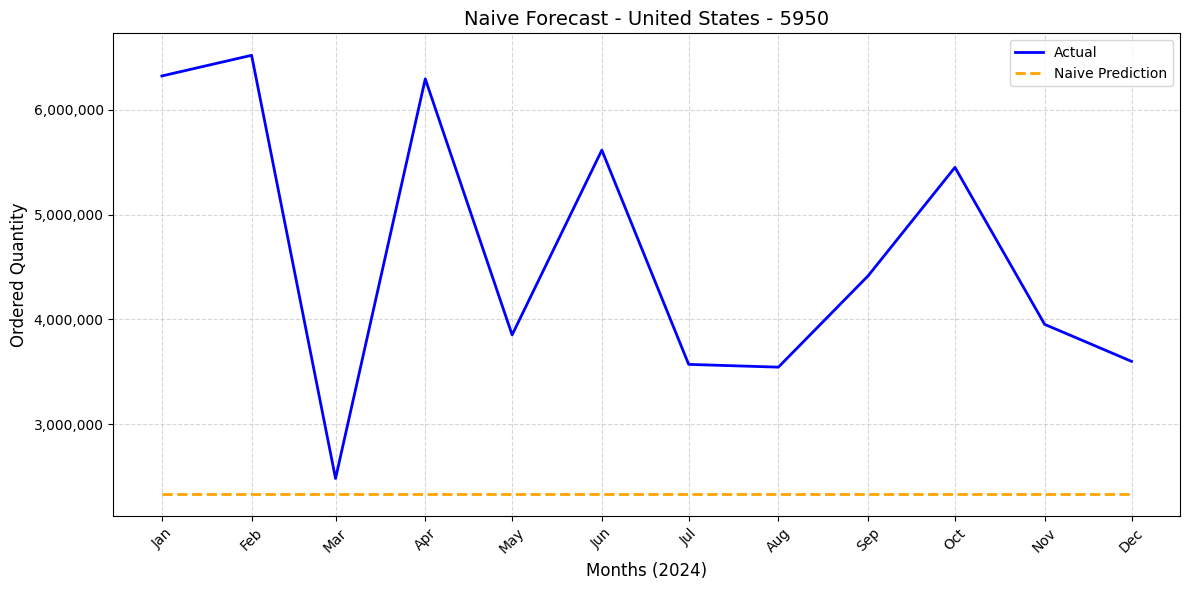

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

# --- Extract test actual and predicted ---
y_test = test['ORDERED_QUANTITY']
y_pred = forecast  # naive predictions

# --- Auto upscale (if scaled earlier) ---
scale_factor = 1
if y_test.mean() < 1000:    # detect if stored in millions
    scale_factor = 1e6

y_test_rescaled = y_test * scale_factor
y_pred_rescaled = y_pred * scale_factor

# --- Plot ---
plt.figure(figsize=(12, 6))

# Actual Test
plt.plot(
    y_test_rescaled.index,
    y_test_rescaled.values,
    label='Actual',
    color='blue',
    linewidth=2
)

# Naive Predictions
plt.plot(
    y_test_rescaled.index,
    y_pred_rescaled,
    label='Naive Prediction',
    color='orange',
    linestyle='--',
    linewidth=2
)

plt.title('Naive Forecast - United States - 5950', fontsize=14)
plt.xlabel('Months (2024)', fontsize=12)
plt.ylabel('Ordered Quantity', fontsize=12)

# --- Grid & Legend ---
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# --- Monthly Ticks ---
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())          # 12 ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))   # Jan, Feb, ...
plt.xticks(rotation=45)

# --- Format Y-axis with commas ---
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}")
)

plt.tight_layout()

# --- Save the figure ---
plt.savefig('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/Naïve_forecast.png')

plt.show()


In [71]:
with mlflow.start_run(run_name="Naïve - US - 5950"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2024-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MAPE", mape)
    
    # Artifacts (plots / reports)
    mlflow.log_artifact('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/naïve_forecast.png')

    # Tags
    mlflow.set_tags({
        "phase": "Baseline Model - Naïve",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run Naïve - US - 5950 at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/4e22c5e414ec41f7a3f42ae16a753386
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


### S-Naïve

In [67]:
# Seasonal naive forecast
s = 12
seasonal_naive_forecast = train['ORDERED_QUANTITY'].iloc[-s:].values
seasonal_naive_forecast = np.tile(seasonal_naive_forecast, int(np.ceil(len(test)/s)))[:len(test)]

# Evaluate
mae_snaive = mean_absolute_error(test['ORDERED_QUANTITY'], seasonal_naive_forecast)
rmse_snaive = np.sqrt(mean_squared_error(test['ORDERED_QUANTITY'], seasonal_naive_forecast))
mape_snaive = np.mean(np.abs((test['ORDERED_QUANTITY'] - seasonal_naive_forecast) / test['ORDERED_QUANTITY'])) * 100

print(f"SNaive MAE: {mae_snaive:,.0f}")
print(f"SNaive RMSE: {rmse_snaive:,.0f}")
print(f"SNaive MAPE: {mape_snaive:.2f}%")


SNaive MAE: 2,069,902
SNaive RMSE: 2,419,561
SNaive MAPE: 52.63%


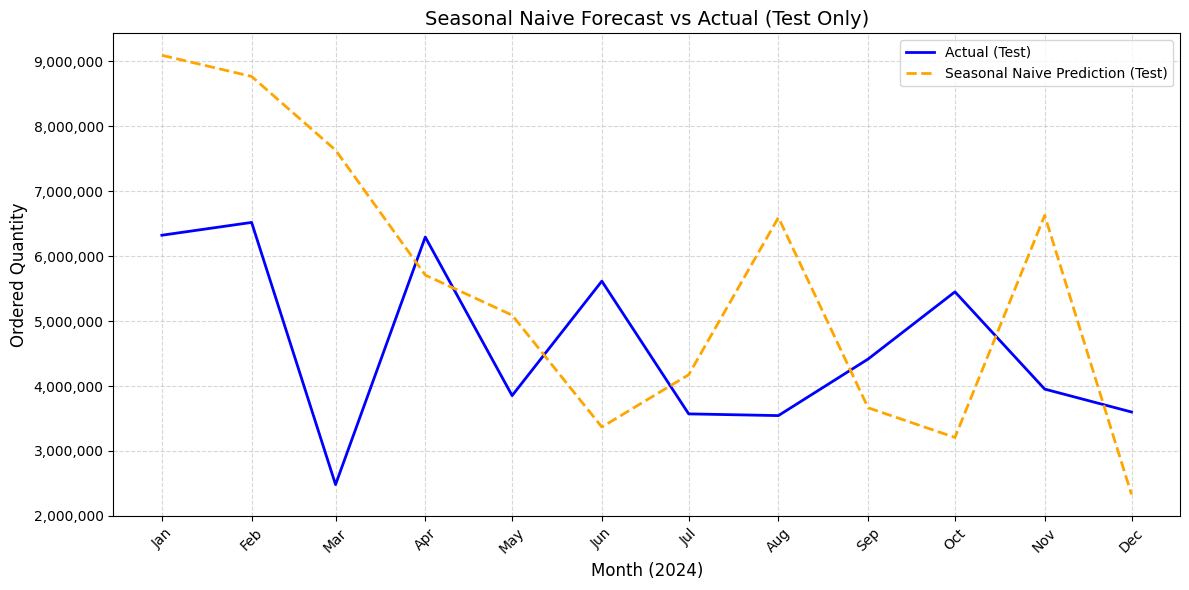

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

# --- Extract test actuals ---
y_test = test['ORDERED_QUANTITY']

# --- Seasonal Naive forecast (already computed) ---
y_pred = seasonal_naive_forecast  # must match length of test

# --- Rescale values (if your data was scaled earlier) ---
# Auto-detect scale: if values < 1000, they were likely divided (e.g., by 1e6)
scale_factor = 1
if y_test.mean() < 1000:
    scale_factor = 1

y_test_rescaled = y_test * scale_factor
y_pred_rescaled = y_pred * scale_factor

# --- Plot ---
plt.figure(figsize=(12, 6))

# Actual test values
plt.plot(y_test_rescaled.index, y_test_rescaled.values, 
         label='Actual (Test)', color='blue', linewidth=2)

# S-Naive predictions
plt.plot(y_test_rescaled.index, y_pred_rescaled, 
         label='Seasonal Naive Prediction (Test)', 
         color='orange', linestyle='--', linewidth=2)

# --- Formatting ---
plt.title('Seasonal Naive Forecast vs Actual (Test Only)', fontsize=14)
plt.xlabel('Month (2024)', fontsize=12)
plt.ylabel('Ordered Quantity', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())        # one tick per month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # Jan, Feb, Mar...
plt.xticks(rotation=45)

# Format y-axis nicely with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.savefig('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/sNaïve_forecast.png')
plt.show()


In [68]:
with mlflow.start_run(run_name="sNaïve - US - 5950"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2024-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MAPE", mape)
    
    # Artifacts (plots / reports)
    mlflow.log_artifact('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/sNaïve_forecast.png')

    # Tags
    mlflow.set_tags({
        "phase": "Baseline Model - sNaïve",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run sNaïve - US - 5950 at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/be3c72cf18234502a08888a52a3e5a89
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


## SARIMA

In [78]:
df_us_5950_pre_ts.head()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2009-01-01,2009,1,183559
2009-02-01,2009,2,1825783
2009-03-01,2009,3,4194220
2009-04-01,2009,4,5093500
2009-05-01,2009,5,4296418


In [79]:
train = df_us_5950_pre_ts.loc['2009':'2023', ['ORDERED_QUANTITY']]
test  = df_us_5950_pre_ts.loc['2024-01-01':'2024-12-31', ['ORDERED_QUANTITY']]

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train['ORDERED_QUANTITY'],
                       order=(0,1,1),             # (p, d, q)
                       seasonal_order=(0,1,1,12), # (P, D, Q, s)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

sarima_pred = sarima_results.get_forecast(steps=len(test))

sarima_pred_mean = sarima_pred.predicted_mean
sarima_pred_ci = sarima_pred.conf_int()


/anaconda/envs/nec10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/anaconda/envs/nec10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Align predictions to test index
y_true = test['ORDERED_QUANTITY']
y_pred = sarima_pred_mean

# Ensure alignment
df_eval = pd.concat([y_true, y_pred], axis=1)
df_eval.columns = ['actual', 'pred']
df_eval = df_eval.dropna()

# Metrics
mae  = mean_absolute_error(df_eval['actual'], df_eval['pred'])
rmse = np.sqrt(mean_squared_error(df_eval['actual'], df_eval['pred']))
mape = np.mean(np.abs((df_eval['actual'] - df_eval['pred']) / df_eval['actual'])) * 100

print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")


MAE : 1,216,873.80
RMSE: 1,673,356.82
MAPE: 33.12%


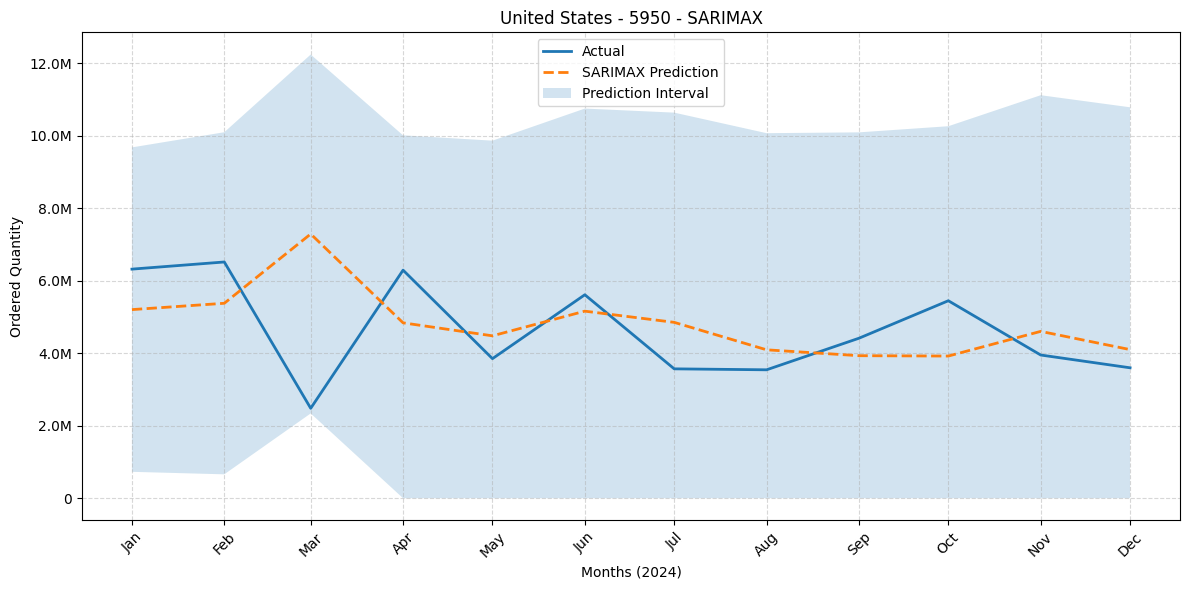

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# ---- Choose your test window ----
test_start, test_end = '2024-01-01', '2024-12-31'

# ---- Slice 2024 data ----
actual_test = test.loc[test_start:test_end]
pred_test   = pred_mean.loc[test_start:test_end]
ci_test     = pred_ci.loc[test_start:test_end]

# ---- Infer whether values are scaled (avoid wrong 1e6 multiplier) ----
# If typical values are < 100, assume they were stored as "millions" and multiply by 1e6; else leave as-is.
typical_actual = float(np.nanmedian(np.abs(actual_test.values)))
typical_pred   = float(np.nanmedian(np.abs(pred_test.values)))
scale_factor = 1.0

actual_plot = actual_test * scale_factor
pred_plot   = pred_test   * scale_factor
ci_plot     = ci_test     * scale_factor

# Optional: enforce non-negative bands if your target can’t be negative
lower = np.maximum(ci_plot.iloc[:, 0].values, 0)
upper = np.maximum(ci_plot.iloc[:, 1].values, 0)

# ---- Plot ----
plt.figure(figsize=(12, 6))
plt.plot(actual_plot.index, actual_plot.values, label='Actual', linewidth=2)
plt.plot(pred_plot.index,   pred_plot.values,   label='SARIMAX Prediction', linestyle='--', linewidth=2)

plt.fill_between(ci_plot.index, lower, upper, alpha=0.2, label='Prediction Interval')

plt.title('United States - 5950 - SARIMAX')
plt.xlabel('Months (2024)')
plt.ylabel('Ordered Quantity')

# Monthly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)

# Format y-axis nicely (show in Millions with commas)
def millions(x, _):
    return f'{x/1e6:,.1f}M' if x >= 1e6 or x <= -1e6 else f'{int(x):,}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/sarima_forecast.png')
plt.show()


In [82]:
with mlflow.start_run(run_name="SARIMA - US - 5950"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2024-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MAPE", mape)
    
    # Artifacts (plots / reports)
    mlflow.log_artifact('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/sarima_forecast.png')

    # Tags
    mlflow.set_tags({
        "phase": "SARIMA",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run SARIMA - US - 5950 at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/1a8858fba75a4c73843dd82b5c652fc4
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


## Prophet

In [105]:
df_us_5950_pre_ts = df_us_5950_pre_ts.reset_index(drop=True)
# Create a proper date column
df_us_5950_pre_ts['DATE'] = pd.to_datetime(df_us_5950_pre_ts[['Year', 'Month']].assign(DAY=1))
df_us_5950_pre_ts = df_us_5950_pre_ts.sort_values('DATE')

In [106]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [107]:
df_prophet = df_us_5950_pre_ts[['DATE', 'ORDERED_QUANTITY']].rename(columns={'DATE': 'ds', 'ORDERED_QUANTITY': 'y'})

In [108]:
df_prophet.head()

,ds,y
0,2009-01-01,183559
1,2009-02-01,1825783
2,2009-03-01,4194220
3,2009-04-01,5093500
4,2009-05-01,4296418


In [116]:
train = df_prophet[(df_prophet['ds'] >= '2009-01-01') & (df_prophet['ds'] < '2024-01-01')]
test  = df_prophet[(df_prophet['ds'] >= '2024-01-01')& (df_prophet['ds'] < '2025-01-01')]

In [66]:
test.tail()

,ds,y
187,2024-08-01,3544113
188,2024-09-01,4415504
189,2024-10-01,5450335
190,2024-11-01,3952265
191,2024-12-01,3599442


In [117]:
model_prophet = Prophet(
    yearly_seasonality=True,   # captures 12-month pattern
    weekly_seasonality=False,  # disable unless you have daily data
    daily_seasonality=False,   
    seasonality_mode='multiplicative'  # use 'multiplicative' if scale of peaks grows over tim
)

model_prophet.fit(train)

02:20:55 - cmdstanpy - INFO - Chain [1] start processing
02:20:55 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
# Forecast same length as your test set
future = model_prophet.make_future_dataframe(periods=len(test), freq='MS')
forecast = model_prophet.predict(future)

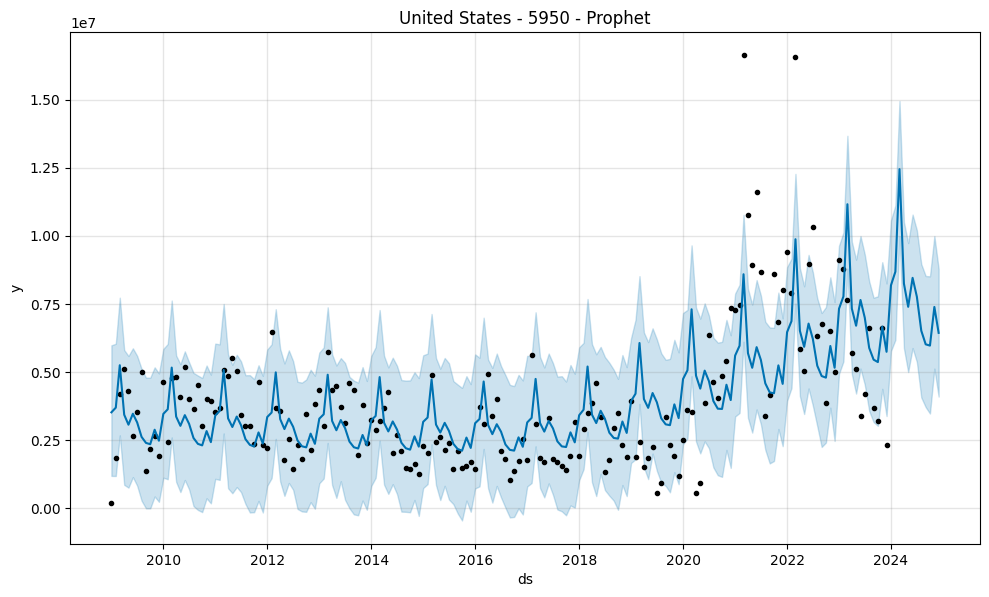

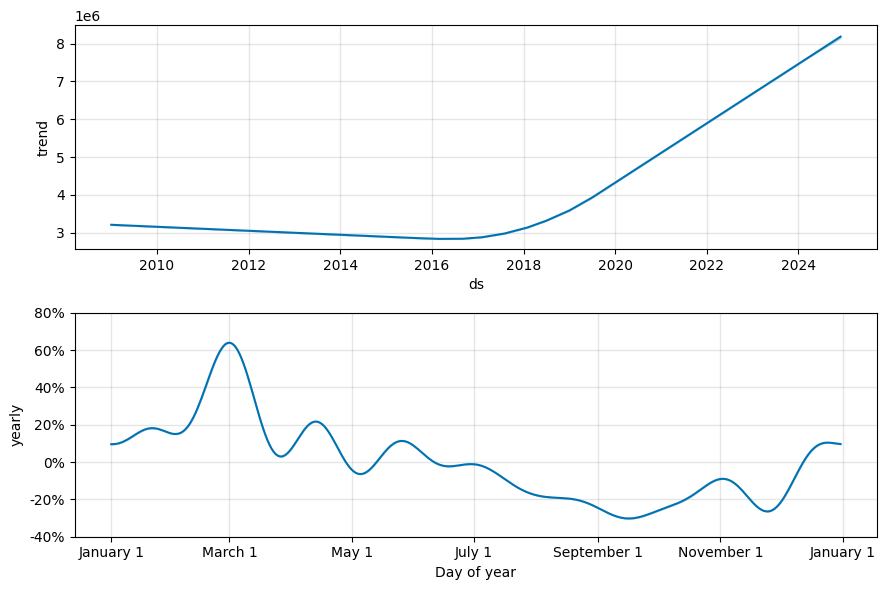

In [119]:
fig1 = model_prophet.plot(forecast)
plt.title('United States - 5950 - Prophet')
#plt.savefig('/Volumes/Kaam-Dhanda/NewEra/Information Docs/WorkingData/Wovens/df_w_app_prophet_forecast.png')
plt.show()

fig2 = model_prophet.plot_components(forecast)
#plt.savefig('/Volumes/Kaam-Dhanda/NewEra/Information Docs/WorkingData/Wovens/df_w_app_prophet_components.png')
plt.show()

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# --- Ensure forecast is aligned ---
forecast_df = forecast.set_index('ds')
pred = forecast_df.reindex(test['ds'], method='nearest')['yhat']

# --- Combine & clean ---
eval_df = pd.concat([test.set_index('ds')['y'], pred], axis=1, join='inner')
eval_df.columns = ['actual', 'pred']
eval_df = eval_df.dropna()

# --- Remove zero actuals to avoid division by zero ---
eval_df = eval_df[eval_df['actual'] != 0]

# --- Compute metrics ---
mae = mean_absolute_error(eval_df['actual'], eval_df['pred'])
rmse = np.sqrt(mean_squared_error(eval_df['actual'], eval_df['pred']))
mape = np.mean(np.abs((eval_df['actual'] - eval_df['pred']) / eval_df['actual'])) * 100

print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")


MAE : 3,155,581.31
RMSE: 3,883,116.28
MAPE: 87.52%


0


## LSTM

In [89]:
df_us_5950_pre_ts.head()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2009-01-01,2009,1,183559
2009-02-01,2009,2,1825783
2009-03-01,2009,3,4194220
2009-04-01,2009,4,5093500
2009-05-01,2009,5,4296418


In [91]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_us_5950_pre_ts[['ORDERED_QUANTITY']])

# Create sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window = 12
X, y = create_sequences(scaled, window)

# Train-test split
split = len(X) - 12
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Predict
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test)


2025-11-14 02:37:57.704656: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-14 02:37:57.755867: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-14 02:37:59.335976: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Epoch 1/50


2025-11-14 02:37:59.694130: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0327 - val_loss: 0.0139
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0163 - val_loss: 0.0169
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0148 - val_loss: 0.0123
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140 - val_loss: 0.0164
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0144 - val_loss: 0.0181
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0134 - val_loss: 0.0146
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0136 - val_loss: 0.0191
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.0168
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0137 - val_loss: 0.0194
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - val_loss: 0.0146
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0131 - val_loss: 0.0209
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0139 - val_l

In [92]:
# 1. Generate predictions (scaled)
pred_scaled = model.predict(X_test)

# 2. Inverse transform to real values
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test)

# Convert to 1D arrays
pred = pred.flatten()
actual = actual.flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(actual, pred)
rmse = np.sqrt(mean_squared_error(actual, pred))
mape = np.mean(np.abs((actual - pred) / actual)) * 100

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 1,279,311.96
RMSE: 1,438,218.75
MAPE: 32.74%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


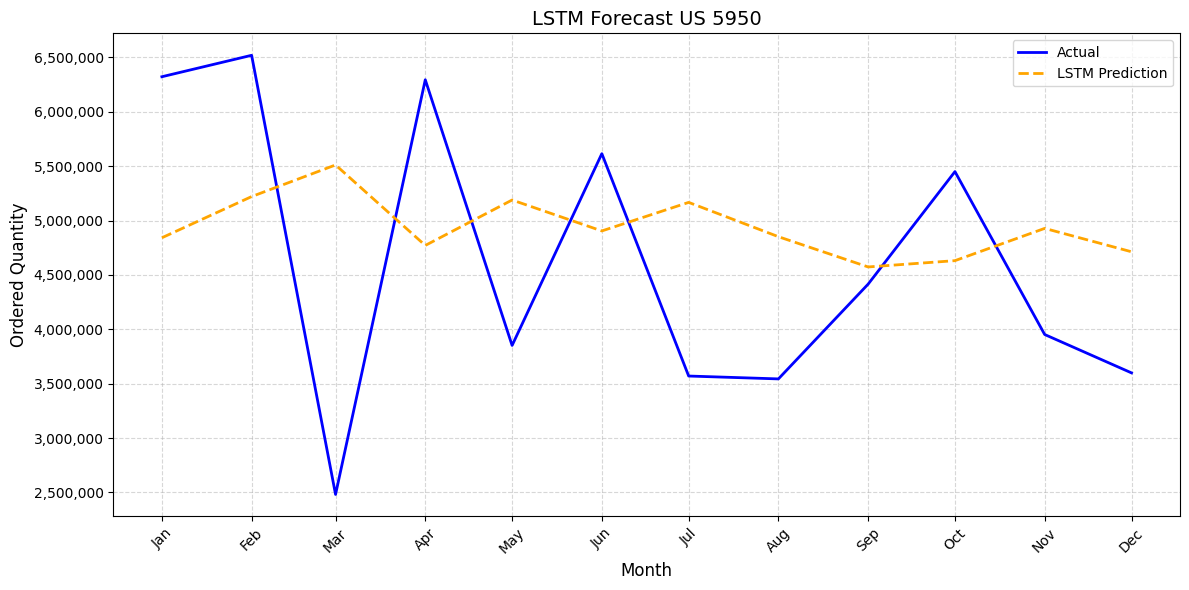

In [98]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

# ------------------------------
# 1️⃣ Inverse-transform predictions and test values
# ------------------------------

# LSTM outputs (scaled)
pred_scaled = model.predict(X_test)

# Convert back to original scale
pred = scaler.inverse_transform(pred_scaled).flatten()
actual = scaler.inverse_transform(y_test).flatten()

# ------------------------------
# 2️⃣ Plot (Test Only)
# ------------------------------

plt.figure(figsize=(12, 6))

# Actual test values
plt.plot(
    test.index,
    actual,
    label='Actual',
    color='blue',
    linewidth=2
)

# Predicted values
plt.plot(
    test.index,
    pred,
    label='LSTM Prediction',
    color='orange',
    linestyle='--',
    linewidth=2
)

plt.title('LSTM Forecast US 5950', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Ordered Quantity', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# ------------------------------
# 3️⃣ Monthly Ticks Formatting
# ------------------------------

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())          # one tick per month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))   # Jan, Feb, Mar...
plt.xticks(rotation=45)

# ------------------------------
# 4️⃣ Pretty y-axis formatting (commas)
# ------------------------------

ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
)

plt.tight_layout()
plt.savefig("/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/lstm_forecast.png")
plt.show()


In [99]:
with mlflow.start_run(run_name="LSTM - US - 5950"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2024-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MAPE", mape)
    
    # Artifacts (plots / reports)
    mlflow.log_artifact("/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/models_artifacts/lstm_forecast.png")

    # Tags
    mlflow.set_tags({
        "phase": "LSTM",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run LSTM - US - 5950 at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/ea027d37f816452e8718894d1abf8190
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


## Temporal Fusion Transformer

In [156]:
df_us_5950_pre_ts.head()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2009-01-01,2009,1,183559
2009-02-01,2009,2,1825783
2009-03-01,2009,3,4194220
2009-04-01,2009,4,5093500
2009-05-01,2009,5,4296418


In [157]:
df_tft = df_us_5950_pre_ts['2009-01-01':'2024-12-01'][['Year', 'Month', 'ORDERED_QUANTITY']].copy()

In [158]:
df_tft.head()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2009-01-01,2009,1,183559
2009-02-01,2009,2,1825783
2009-03-01,2009,3,4194220
2009-04-01,2009,4,5093500
2009-05-01,2009,5,4296418


In [159]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reset index so DATE becomes a column again
df_tft = df_tft.reset_index().copy()

# Continuous time index (each month → +1)
df_tft['time_idx'] = np.arange(len(df_tft))

# A single group identifier (TFT always needs this)
df_tft['group'] = 'US_5950'

# Add month as numeric known covariate
df_tft['month'] = df_tft['Month']

# Scale the target
scaler = StandardScaler()
df_tft['target'] = scaler.fit_transform(df_tft[['ORDERED_QUANTITY']])

df_tft = df_tft.dropna().reset_index(drop=True)
print(df_tft.head())


        DATE  Year  Month  ORDERED_QUANTITY  time_idx    group  month  \
0 2009-01-01  2009      1            183559         0  US_5950      1   
1 2009-02-01  2009      2           1825783         1  US_5950      2   
2 2009-03-01  2009      3           4194220         2  US_5950      3   
3 2009-04-01  2009      4           5093500         3  US_5950      4   
4 2009-05-01  2009      5           4296418         4  US_5950      5   

     target  
0 -1.497895  
1 -0.836872  
2  0.116465  
3  0.478440  
4  0.157601  


In [160]:
print(df_tft["DATE"].min(), "→", df_tft["DATE"].max())
print("Total months:", df_tft.shape[0])

2009-01-01 00:00:00 → 2024-12-01 00:00:00
Total months: 192


In [161]:
print(df_tft["time_idx"].min(), df_tft["time_idx"].max())
print("Total months:", df_tft["time_idx"].nunique())

0 191
Total months: 192


In [162]:
from pytorch_forecasting import TimeSeriesDataSet

# Window lengths
max_encoder_length = 36    # use past 36 months
max_prediction_length = 12  # predict next 12 months

# Training cutoff
training_cutoff = df_tft['time_idx'].max() - max_prediction_length

training = TimeSeriesDataSet(
    df_tft[df_tft.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="target",
    group_ids=["group"],
    time_varying_known_reals=["time_idx", "month"],
    time_varying_unknown_reals=["target"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
)

validation = TimeSeriesDataSet.from_dataset(
    training,
    df_tft,
    predict=True,
    stop_randomization=True
)


In [ ]:
train_loader = training.to_dataloader(train=True, batch_size=32, num_workers=0)
val_loader   = validation.to_dataloader(train=False, batch_size=32, num_workers=0)

print(len(train_loader.dataset), len(val_loader.dataset))


133 1


In [164]:
from pytorch_forecasting import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.005,
    hidden_size=32,
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=16,
    output_size=7,   # ✅ one per quantile
    loss=QuantileLoss(),  # default quantiles = 7
)



/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


In [165]:
from pytorch_lightning import Trainer

trainer = Trainer(
    max_epochs=50,
    gradient_clip_val=0.1,
    accelerator="cpu",
    logger=False  # or "gpu" if you have CUDA
)

trainer.fit(tft, train_loader, val_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 96    
4  | static_variable_selection          | VariableSelectionNetwork        | 0     
5  | encoder_variable_selection         | VariableSelectionNetwork     

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 49: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 14.00it/s, loss=0.31, train_loss_step=0.231, val_loss=0.555, train_loss_epoch=0.300]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.49it/s, loss=0.31, train_loss_step=0.231, val_loss=0.555, train_loss_epoch=0.300]


In [176]:
# ⚡ Generate predictions from the trained model
raw_predictions, x = tft.predict(val_loader, mode="raw", return_x=True)
#quantiles = tft.predict(val_loader, mode="quantiles")


In [177]:
# Extract the median forecast (quantile = 0.5)
pred_median = raw_predictions["prediction"][:, :, 1]  # ✅ correct key access

# Convert to numpy
pred_median = pred_median.detach().cpu().numpy().flatten()

# Inverse-scale to original PO_QUANTITY units
pred_median_rescaled = scaler.inverse_transform(pred_median.reshape(-1, 1)).flatten()


In [178]:
# Reconstruct dataframe for plotting
forecast_df = pd.DataFrame({
    "DATE": df_tft.loc[df_tft.time_idx.isin(
        x["decoder_time_idx"].flatten().cpu().numpy()
    ), "DATE"].values,
    "Predicted_PO_QUANTITY": pred_median_rescaled
}).drop_duplicates(subset="DATE")

# Merge with actual values
comparison = df_tft.merge(forecast_df, on="DATE", how="left")
comparison["Actual_PO_QUANTITY"] = scaler.inverse_transform(
    comparison["target"].values.reshape(-1, 1)
).flatten()

comparison.tail(10)


,DATE,Year,Month,ORDERED_QUANTITY,time_idx,group,month,target,Predicted_PO_QUANTITY,Actual_PO_QUANTITY
182,2024-03-01,2024,3,2481692,182,US_5950,3,-0.572857,5409080.00,2481692.0
183,2024-04-01,2024,4,6294758,183,US_5950,4,0.961967,4401348.00,6294758.0
184,2024-05-01,2024,5,3851889,184,US_5950,5,-0.021329,3431784.25,3851889.0
185,2024-06-01,2024,6,5615130,185,US_5950,6,0.688405,3972481.00,5615130.0
186,2024-07-01,2024,7,3570537,186,US_5950,7,-0.134578,4239464.00,3570537.0
187,2024-08-01,2024,8,3544113,187,US_5950,8,-0.145214,4378157.00,3544113.0
188,2024-09-01,2024,9,4415504,188,US_5950,9,0.205535,4467832.00,4415504.0
189,2024-10-01,2024,10,5450335,189,US_5950,10,0.622073,4539066.00,5450335.0
190,2024-11-01,2024,11,3952265,190,US_5950,11,0.019074,4592752.00,3952265.0
191,2024-12-01,2024,12,3599442,191,US_5950,12,-0.122944,4631792.50,3599442.0


In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

comparison_clean = comparison.dropna(subset=["Actual_PO_QUANTITY", "Predicted_PO_QUANTITY"])

# --- Extract values ---
y_true = comparison_clean["Actual_PO_QUANTITY"].values
y_pred = comparison_clean["Predicted_PO_QUANTITY"].values

# --- Metrics ---
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100

# --- Print results ---
print(f"📊 Temporal Fusion Transformer Performance Metrics")
print(f"MAE   : {mae:,.2f}")
print(f"RMSE  : {rmse:,.2f}")
print(f"MAPE  : {mape:.2f}%")


📊 Temporal Fusion Transformer Performance Metrics
MAE   : 1,000,801.35
RMSE  : 1,263,910.58
MAPE  : 25.73%


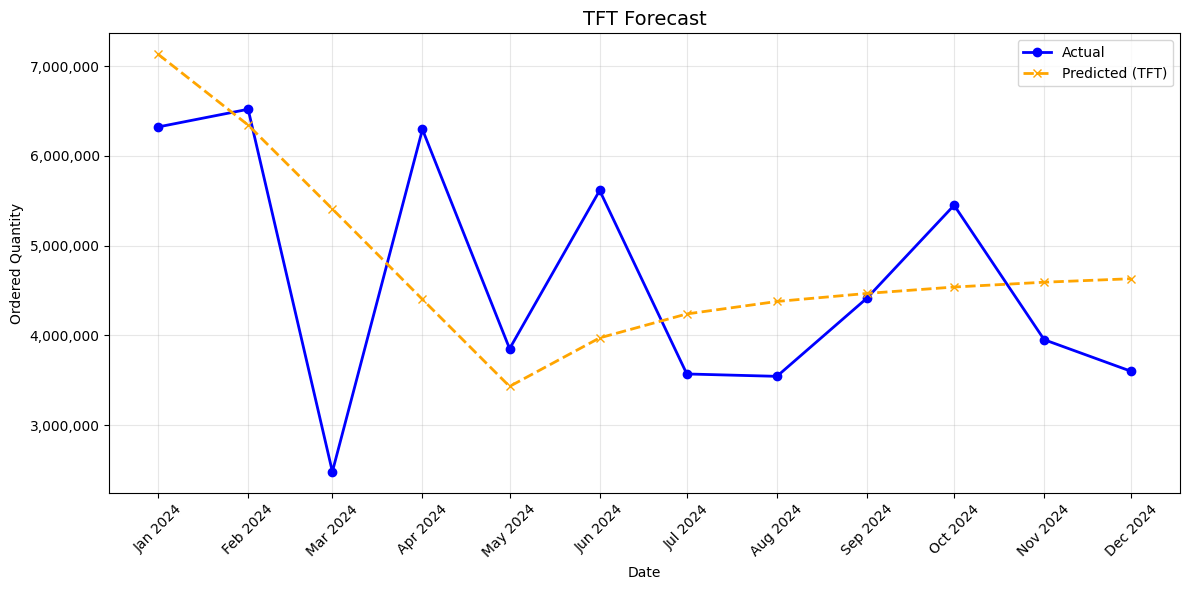

In [180]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# keep only test rows
test_cutoff = df_tft['time_idx'].max() - 12
comparison_test = comparison[comparison["time_idx"] > test_cutoff]

plt.figure(figsize=(12,6))

plt.plot(
    comparison_test["DATE"], 
    comparison_test["Actual_PO_QUANTITY"],
    label="Actual", 
    marker="o", 
    linewidth=2, 
    color="blue"
)

plt.plot(
    comparison_test["DATE"], 
    comparison_test["Predicted_PO_QUANTITY"],
    label="Predicted (TFT)", 
    linestyle="--", 
    marker="x", 
    linewidth=2,
    color="orange"
)

plt.title("TFT Forecast", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Ordered Quantity")

# Monthly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Format thousands with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_: f"{int(x):,}"))

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/tft_mape25_forecast.png')
plt.show()


In [170]:
save_path = "/home/azureuser/cloudfiles/code/Users/vlavanga/model_repo/tft_us_5950_mape25.ckpt"
trainer.save_checkpoint(save_path)


In [172]:
import pickle

with open("/home/azureuser/cloudfiles/code/Users/vlavanga/model_repo/tft_training_dataset_mape25.pkl", "wb") as f:
    pickle.dump(training, f)

In [186]:
with mlflow.start_run(run_name="TFT(mape25) - US - 5950"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2024-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MAPE", mape)
    
    # Artifacts (plots / reports)
    mlflow.log_artifact("/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/tft_mape25_forecast.png")

    # Tags
    mlflow.set_tags({
        "model": "TFT - Temporal Fusion Transformer",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run TFT(mape25) - US - 5950 at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/da202d0eb3b24b27bf6e396ce6637e31
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


## TFT Model Validation

In [181]:
max_prediction_length = 12       # forecast horizon (12 months)
max_encoder_length = 36          # use past 36 months history
n_folds = 5                      # number of rolling folds


In [182]:
import numpy as np
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer
from sklearn.metrics import mean_absolute_error

fold_mapes = []

max_time_idx = df_tft["time_idx"].max()

for fold in range(n_folds):
    print(f"\n============================")
    print(f"⭐ ROLLING FOLD {fold+1}/{n_folds}")
    print("============================")

    # ------------------------
    # 1. Compute fold cutoff
    # ------------------------
    val_end = max_time_idx - fold * max_prediction_length
    val_start = val_end - max_prediction_length + 1
    train_end = val_start - max_prediction_length - 1

    print(f"Train: time_idx ≤ {train_end}")
    print(f"Val : {val_start} → {val_end}")

    df_train = df_tft[df_tft.time_idx <= train_end]
    df_val   = df_tft[(df_tft.time_idx >= val_start) & 
                      (df_tft.time_idx <= val_end)]

    # ------------------------
    # 2. Build TFT training dataset
    # ------------------------
    training = TimeSeriesDataSet(
        df_train,
        time_idx="time_idx",
        target="target",
        group_ids=["group"],
        time_varying_known_reals=["time_idx", "month"],
        time_varying_unknown_reals=["target"],
        max_encoder_length=max_encoder_length,
        max_prediction_length=max_prediction_length,
    )

    validation = TimeSeriesDataSet.from_dataset(
        training,
        df_tft,
        predict=True,
        stop_randomization=True
    )

    train_loader = training.to_dataloader(train=True, batch_size=32, num_workers=0)
    val_loader   = validation.to_dataloader(train=False, batch_size=32, num_workers=0)

    # ------------------------
    # 3. Define fold-model
    # ------------------------
    tft = TemporalFusionTransformer.from_dataset(
        training,
        learning_rate=0.005,
        hidden_size=32,
        attention_head_size=4,
        dropout=0.1,
        hidden_continuous_size=16,
        loss=QuantileLoss(),
    )

    trainer = Trainer(
        max_epochs=30,
        gradient_clip_val=0.1,
        logger=False,
        accelerator="cpu",
    )

    trainer.fit(tft, train_loader, val_loader)

    # ------------------------
    # 4. Predict for this fold's validation period
    # ------------------------
    raw_preds, x = tft.predict(val_loader, mode="raw", return_x=True)

    # extract P50 (quantile=0.5)
    p50_scaled = raw_preds["prediction"][:, :, 1]  # median
    p50 = training.target_normalizer.inverse_transform(
        p50_scaled.unsqueeze(-1).repeat(1,1,2)
    )[:, :, 0].cpu().numpy().flatten()

    # true values
    y_true = df_val["target"].values[:len(p50)]

    # ------------------------
    # 5. Compute MAPE for this fold
    # ------------------------
    mape = np.mean(np.abs((y_true - p50) / (y_true + 1e-8))) * 100
    fold_mapes.append(mape)

    print(f"Fold {fold+1} MAPE: {mape:.2f}%")


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec


⭐ ROLLING FOLD 1/5
Train: time_idx ≤ 167
Val : 180 → 191
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15.10it/s, loss=0.417, train_loss_step=0.323, val_loss=0.981, train_loss_epoch=0.357]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.19it/s, loss=0.417, train_loss_step=0.323, val_loss=0.981, train_loss_epoch=0.357]


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15.52it/s, loss=0.318, train_loss_step=0.245, val_loss=1.130, train_loss_epoch=0.303]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.42it/s, loss=0.318, train_loss_step=0.245, val_loss=1.130, train_loss_epoch=0.303]


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 29: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.05it/s, loss=0.19, train_loss_step=0.186, val_loss=0.388, train_loss_epoch=0.187]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.68it/s, loss=0.19, train_loss_step=0.186, val_loss=0.388, train_loss_epoch=0.187]


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.07it/s, loss=0.264, train_loss_step=0.225, val_loss=0.619, train_loss_epoch=0.223]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.17it/s, loss=0.264, train_loss_step=0.225, val_loss=0.619, train_loss_epoch=0.223]


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.94it/s, loss=0.216, train_loss_step=0.186, val_loss=0.480, train_loss_epoch=0.190]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  9.99it/s, loss=0.216, train_loss_step=0.186, val_loss=0.480, train_loss_epoch=0.190]


In [188]:
print("\n===================================")
print("📌 ROLLING ORIGIN CV RESULTS:")
print("===================================")
print("MAPE per fold:", fold_mapes)
mean_mape = round(np.mean(fold_mapes),2)
std_mape = round(np.std(fold_mapes),2)
print(f"Std MAPE : {std_mape}%")
print(f"Mean MAPE: {mean_mape}%")



📌 ROLLING ORIGIN CV RESULTS:
MAPE per fold: [173.1485997139326, 105.31694629631774, 283.55020186196765, 94.47495768673498, 134.46948404106436]
Std MAPE : 68.35%
Mean MAPE: 158.19%


In [189]:
with mlflow.start_run(run_name="TFT(Cross Validation) - US - 5950"):
    # Parameters
    mlflow.log_param("data_source", "Snowflake: NECCDMDEV.FACTS.FACT_PURCHASE_ORDER_ANALYSIS")
    mlflow.log_param("date_range", "2009-01 to 2024-12")
    mlflow.log_param("granularity", "Monthly")
    mlflow.log_param("target_variable", "ORDERED_QUANTITY")

    # Metrics
    mlflow.log_metric("Std MAPE", std_mape)
    mlflow.log_metric("Mean MAPE", mean_mape)
    
    # Artifacts (plots / reports)
    #mlflow.log_artifact("/home/azureuser/cloudfiles/code/Users/vlavanga/data/processed/united_states/tft_mape25_forecast.png")

    # Tags
    mlflow.set_tags({
        "model": "TFT - Temporal Fusion Transformer - Cross Validation",
        "Sales_Org": "United States",
        "Silhouette": "5950",
        "fabric_type": "Wovens",
        "division": "Headwear",
        "data_version": "v4.0"
    })

🏃 View run TFT(Cross Validation) - US - 5950 at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3/runs/1d2b24bc390a48ce922f114ffea34b1d
🧪 View experiment at: https://dagshub.com/vlavanga/NEC-Falcons.mlflow/#/experiments/3


## TFT Cross Validation

In [191]:
import numpy as np
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer
from sklearn.metrics import mean_absolute_error

fold_mapes = []

max_time_idx = df_tft["time_idx"].max()

for fold in range(n_folds):
    print(f"\n============================")
    print(f"⭐ ROLLING FOLD {fold+1}/{n_folds}")
    print("============================")

    # ------------------------
    # 1. Compute fold cutoff
    # ------------------------
    val_end = max_time_idx - fold * max_prediction_length
    val_start = val_end - max_prediction_length + 1
    train_end = val_start - max_prediction_length - 1

    print(f"Train: time_idx ≤ {train_end}")
    print(f"Val : {val_start} → {val_end}")

    df_train = df_tft[df_tft.time_idx <= train_end]
    df_val   = df_tft[(df_tft.time_idx >= val_start) & 
                      (df_tft.time_idx <= val_end)]

    # ------------------------
    # 2. Build TFT training dataset
    # ------------------------
    training = TimeSeriesDataSet(
        df_train,
        time_idx="time_idx",
        target="target",
        group_ids=["group"],
        time_varying_known_reals=["time_idx", "month"],
        time_varying_unknown_reals=["target"],
        max_encoder_length=max_encoder_length,
        max_prediction_length=max_prediction_length,
    )

    validation = TimeSeriesDataSet.from_dataset(
        training,
        df_tft,
        predict=True,
        stop_randomization=True
    )

    train_loader = training.to_dataloader(train=True, batch_size=32, num_workers=0)
    val_loader   = validation.to_dataloader(train=False, batch_size=32, num_workers=0)

    # ------------------------
    # 3. Define fold-model
    # ------------------------
    tft = TemporalFusionTransformer.from_dataset(
        training,
        learning_rate=0.001,
        hidden_size=32,
        attention_head_size=4,
        dropout=0.1,
        hidden_continuous_size=16,
        loss=QuantileLoss(),
    )

    early_stop = EarlyStopping(monitor="val_loss", patience=5)

    trainer = Trainer(
        max_epochs=200,
        gradient_clip_val=0.1,
        accelerator="cpu",
        callbacks=[early_stop],
        logger=False
    )

    trainer.fit(tft, train_loader, val_loader)

    # ------------------------
    # 4. Predict for this fold's validation period
    # ------------------------
    raw_preds, x = tft.predict(val_loader, mode="raw", return_x=True)

    # extract P50 (quantile=0.5)
    p50_scaled = raw_preds["prediction"][:, :, 1]  # median
    p50 = training.target_normalizer.inverse_transform(
        p50_scaled.unsqueeze(-1).repeat(1,1,2)
    )[:, :, 0].cpu().numpy().flatten()

    # true values
    y_true = df_val["target"].values[:len(p50)]

    # ------------------------
    # 5. Compute MAPE for this fold
    # ------------------------
    mape = np.mean(np.abs((y_true - p50) / (y_true + 1e-8))) * 100
    fold_mapes.append(mape)

    print(f"Fold {fold+1} MAPE: {mape:.2f}%")


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec


⭐ ROLLING FOLD 1/5
Train: time_idx ≤ 167
Val : 180 → 191


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 47: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.35it/s, loss=0.454, train_loss_step=0.392, val_loss=0.732, train_loss_epoch=0.442]


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 37: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.62it/s, loss=0.459, train_loss_step=0.614, val_loss=1.000, train_loss_epoch=0.450]


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 51: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.15it/s, loss=0.19, train_loss_step=0.192, val_loss=0.570, train_loss_epoch=0.187]

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec


Fold 3 MAPE: 298.77%

⭐ ROLLING FOLD 4/5
Train: time_idx ≤ 131
Val : 144 → 155
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 78: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.75it/s, loss=0.192, train_loss_step=0.197, val_loss=0.621, train_loss_epoch=0.190]


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/falconsvjam/code/Users/vlavanga/notebooks/chec

/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.79it/s, loss=0.234, train_loss_step=0.226, val_loss=0.527, train_loss_epoch=0.227]


In [192]:
print("\n===================================")
print("📌 ROLLING ORIGIN CV RESULTS:")
print("===================================")
print("MAPE per fold:", fold_mapes)
mean_mape = round(np.mean(fold_mapes),2)
std_mape = round(np.std(fold_mapes),2)
print(f"Std MAPE : {std_mape}%")
print(f"Mean MAPE: {mean_mape}%")



📌 ROLLING ORIGIN CV RESULTS:
MAPE per fold: [486.4570215447399, 163.71399583634945, 298.7709991756931, 150.83488825547366, 451.59468768785473]
Std MAPE : 140.03%
Mean MAPE: 310.27%


## TFT for 2025

In [193]:
df_us_5950_pre_ts.tail()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2025-07-01,2025,7,5745551
2025-08-01,2025,8,4970012
2025-09-01,2025,9,3088946
2025-10-01,2025,10,4510275
2025-11-01,2025,11,97301


In [194]:
from pytorch_forecasting import TemporalFusionTransformer

save_path = "/home/azureuser/cloudfiles/code/Users/vlavanga/model_repo/tft_us_5950_mape25.ckpt"


tft_loaded = TemporalFusionTransformer.load_from_checkpoint(
    save_path,
    map_location="cpu"
)


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


In [207]:
df_tft_2025 = df_us_5950_pre_ts['2025-01-01':'2025-10-01'][['Year', 'Month', 'ORDERED_QUANTITY']].copy()
df_2025 = df_tft_2025.reset_index() 

In [208]:
df_2025.head()

,DATE,Year,Month,ORDERED_QUANTITY
0,2025-01-01,2025,1,3942788
1,2025-02-01,2025,2,4186653
2,2025-03-01,2025,3,4666902
3,2025-04-01,2025,4,5880520
4,2025-05-01,2025,5,2753493


In [209]:
last_idx = df_tft['time_idx'].max()  # should be 191

df_2025['time_idx'] = np.arange(last_idx + 1, last_idx + 1 + len(df_2025))
df_2025['group'] = 'US_5950'
df_2025['month'] = df_2025['Month']
df_2025['target'] = scaler.transform(df_2025[['ORDERED_QUANTITY']])


In [210]:
pred_dataset = TimeSeriesDataSet.from_dataset(
    training,
    df_2025,
    predict=True,
    stop_randomization=True
)

pred_loader = pred_dataset.to_dataloader(train=False, batch_size=32, num_workers=0)


/anaconda/envs/nec10/lib/python3.10/site-packages/pytorch_forecasting/data/timeseries.py:1282: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 1 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__group': 'US_5950'}]
  warnings.warn(


AssertionError: filters should not remove entries all entries - check encoder/decoder lengths and lags

In [205]:
raw_preds, x = tft_loaded.predict(pred_loader, mode="raw", return_x=True)

p50_scaled = raw_preds["prediction"][0, :, 1].detach().cpu().numpy()

p50 = scaler.inverse_transform(p50_scaled.reshape(-1, 1)).flatten()


In [206]:
df_2025['P50_Prediction'] = p50


ValueError: Length of values (12) does not match length of index (202)

## LightGBM

In [14]:
df_us_5950.head()

,PO_CREATED_DATE,SALES_ORG_NAME,FABRIC_TYPE,TEAM,SILHOUETTE,SPORT,DIVISION_NAME,SEASON_CONSOLIDATION,ORDERED_QUANTITY,Year,Month
0,2023-11-03,United States,Wovens,RANCHO CUCAMONGA QUAKES,5950,BASEBALL,Headwear,Program,1,2023,11
1,2023-11-03,United States,Wovens,RENO ACES,5950,BASEBALL,Headwear,Program,1,2023,11
2,2023-10-25,United States,Other,SAN FRANCISCO GIANTS,5950,BASEBALL,Headwear,Custom,144,2023,10
3,2023-10-11,United States,Other,SAN DIEGO PADRES,5950,BASEBALL,Headwear,Custom,80,2023,10
4,2023-10-24,United States,Wovens,HOUSTON ASTROS,5950,BASEBALL,Headwear,Custom,864,2023,10


In [ ]:
df_us_5950_pre_ts = prepare_pre_ts_data(df_us_5950)

In [16]:
df_us_5950_pre_ts.head()

,Year,Month,ORDERED_QUANTITY
DATE,,,
2009-01-01,2009,1,183559
2009-02-01,2009,2,1825783
2009-03-01,2009,3,4194220
2009-04-01,2009,4,5093500
2009-05-01,2009,5,4296418


In [17]:
import pandas as pd
import numpy as np

# Copy dataset
df = df_us_5950_pre_ts.copy().reset_index()   # brings DATE out of index

df['DATE'] = pd.to_datetime(df['DATE'])

# --- Basic time features ---
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['quarter'] = df['DATE'].dt.quarter
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

# --- Lag features ---
df['lag_1'] = df['ORDERED_QUANTITY'].shift(1)
df['lag_12'] = df['ORDERED_QUANTITY'].shift(12)

# --- Rolling window features ---
df['roll_mean_3']  = df['ORDERED_QUANTITY'].shift(1).rolling(3).mean()
df['roll_mean_12'] = df['ORDERED_QUANTITY'].shift(1).rolling(12).mean()
df['roll_std_12']  = df['ORDERED_QUANTITY'].shift(1).rolling(12).std()

# Drop early rows that contain NaN due to lags
df = df.dropna().reset_index(drop=True)

df.head()


,DATE,Year,Month,ORDERED_QUANTITY,year,month,quarter,month_sin,month_cos,lag_1,lag_12,roll_mean_3,roll_mean_12,roll_std_12
0,2010-01-01,2010,1,4623402,2010,1,1,0.500000,8.660254e-01,1904981.0,183559.0,2.234406e+06,2.898532e+06,1.529937e+06
1,2010-02-01,2010,2,2423643,2010,2,1,0.866025,5.000000e-01,4623402.0,1825783.0,3.052752e+06,3.268519e+06,1.338561e+06
2,2010-03-01,2010,3,4780083,2010,3,1,1.000000,6.123234e-17,2423643.0,4194220.0,2.984009e+06,3.318341e+06,1.290234e+06
3,2010-04-01,2010,4,4814944,2010,4,2,0.866025,-5.000000e-01,4780083.0,5093500.0,3.942376e+06,3.367163e+06,1.336640e+06
4,2010-05-01,2010,5,4082294,2010,5,2,0.500000,-8.660254e-01,4814944.0,4296418.0,4.006223e+06,3.343950e+06,1.306001e+06


In [32]:
train = df[df['DATE'] < '2024-01-01']
test = df[(df['DATE'] >= '2024-01-01') & (df['DATE'] < '2025-01-01')].reset_index(drop=True)

In [33]:
FEATURES = [
    'year', 'month', 'quarter',
    'month_sin', 'month_cos',
    'lag_1', 'lag_12',
    'roll_mean_3', 'roll_mean_12', 'roll_std_12'
]

TARGET = 'ORDERED_QUANTITY'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [34]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

model = lgb.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.01,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(period=50)  # optional logging every 50 rounds
    ]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 168, number of used features: 10
[LightGBM] [Info] Start training from score 3924621.059524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.01, n_estimators=2000,
              subsample=0.8)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE : {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAPE: {mape:.2f}%")


MAE : 1,041,230
RMSE: 1,205,353
MAPE: 25.02%


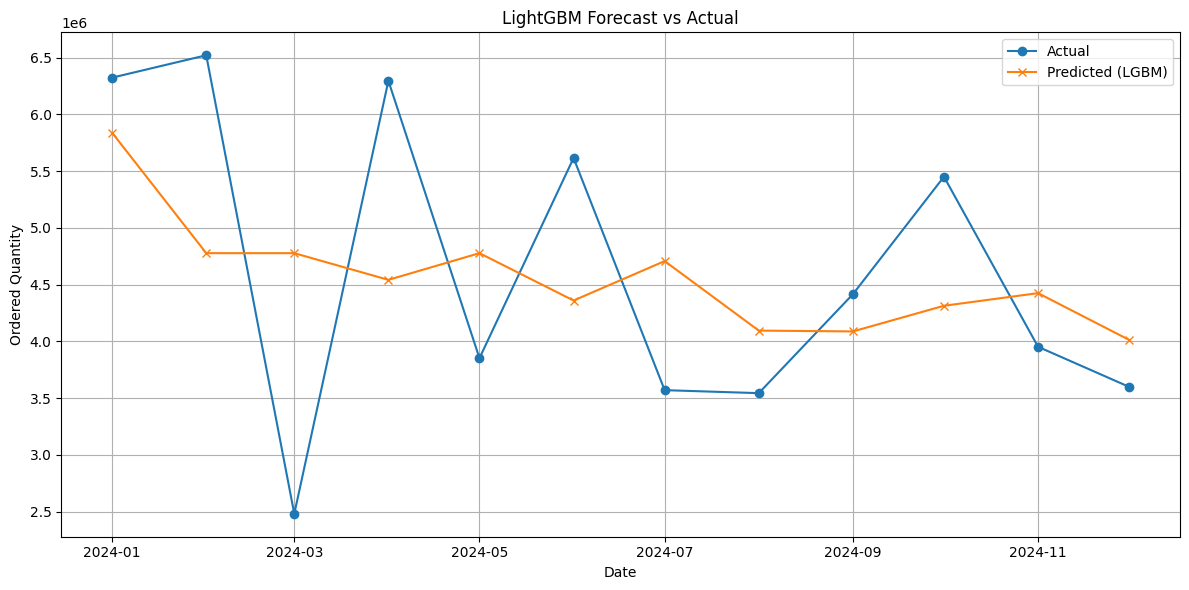

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(test['DATE'], y_test, label="Actual", marker='o')
plt.plot(test['DATE'], y_pred, label="Predicted (LGBM)", marker='x')
plt.title("LightGBM Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Ordered Quantity")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
